<a href="https://colab.research.google.com/github/AKHIL-75/AIML-2025_B16/blob/main/2303A51065_Q13_B16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

<a href="https://colab.research.google.com/github/AKHIL-75/AIML-2025_B16/blob/main/2303A51065_13_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Top 5 days with the highest rentals:
         dteday   cnt
623  2012-09-15  8714
637  2012-09-29  8555
630  2012-09-22  8395
447  2012-03-23  8362
504  2012-05-19  8294


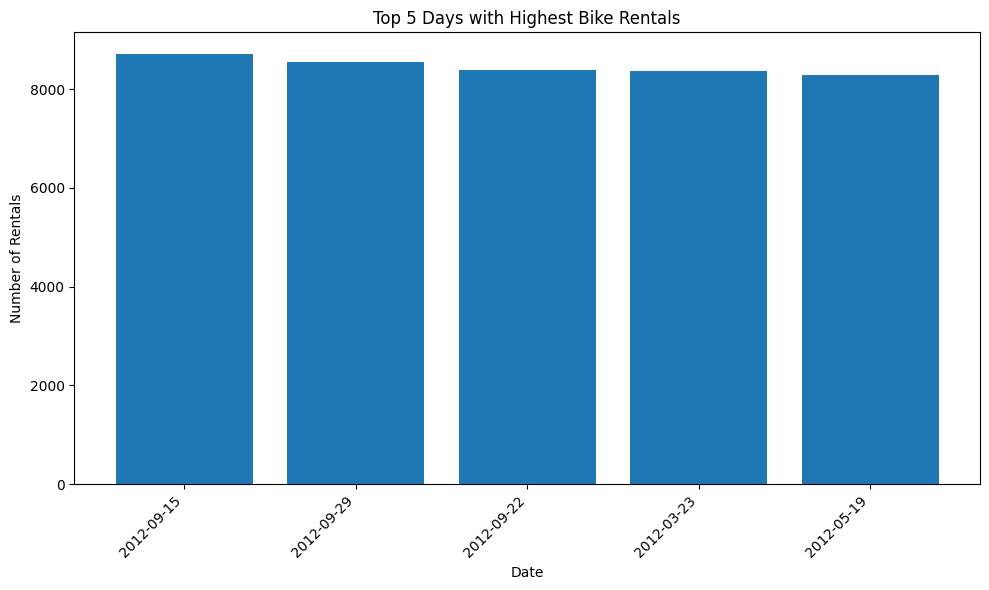

In [ ]:
day_data_path = '/content/day.csv'
hour_data_path = '/content/hour.csv'
day_data = pd.read_csv(day_data_path)
top_days = day_data.nlargest(5, 'cnt')[['dteday', 'cnt']]
print("Top 5 days with the highest rentals:")
print(top_days)
plt.figure(figsize=(10, 6))
plt.bar(top_days['dteday'], top_days['cnt'])
plt.xlabel("Date")
plt.ylabel("Number of Rentals")
plt.title("Top 5 Days with Highest Bike Rentals")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Holidays with the highest bike rentals:
         dteday   cnt
550  2012-07-04  7403
471  2012-04-16  6370
681  2012-11-12  6269
184  2011-07-04  6043
513  2012-05-28  6043


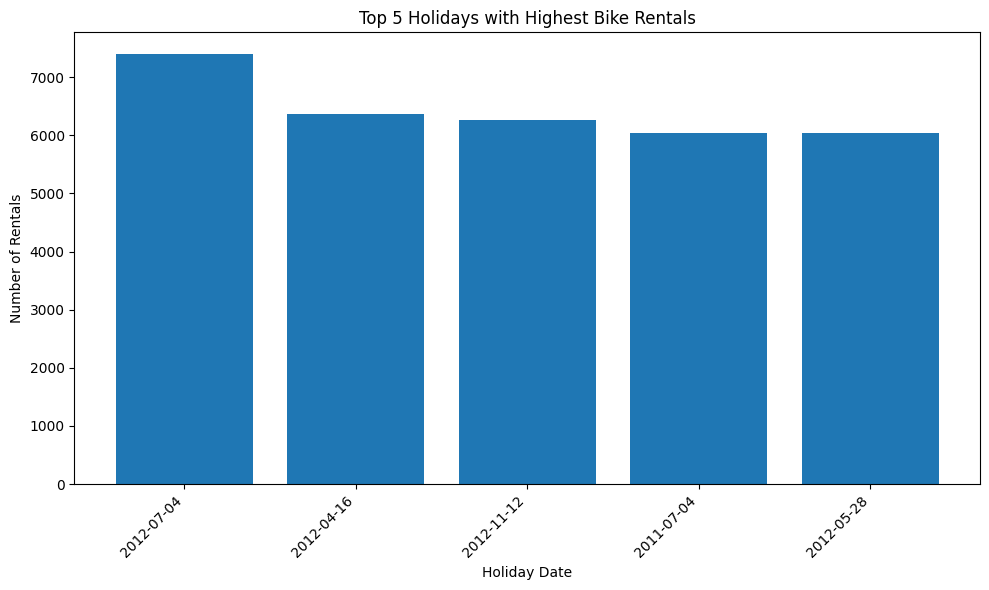

In [ ]:
day_data_path = '/content/day.csv'
day_data = pd.read_csv(day_data_path)
holiday_data = day_data[day_data['holiday'] == 1]
top_holidays = holiday_data.nlargest(5, 'cnt')[['dteday', 'cnt']]
print("Holidays with the highest bike rentals:")
print(top_holidays)
plt.figure(figsize=(10, 6))
plt.bar(top_holidays['dteday'], top_holidays['cnt'])
plt.xlabel("Holiday Date")
plt.ylabel("Number of Rentals")
plt.title("Top 5 Holidays with Highest Bike Rentals")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

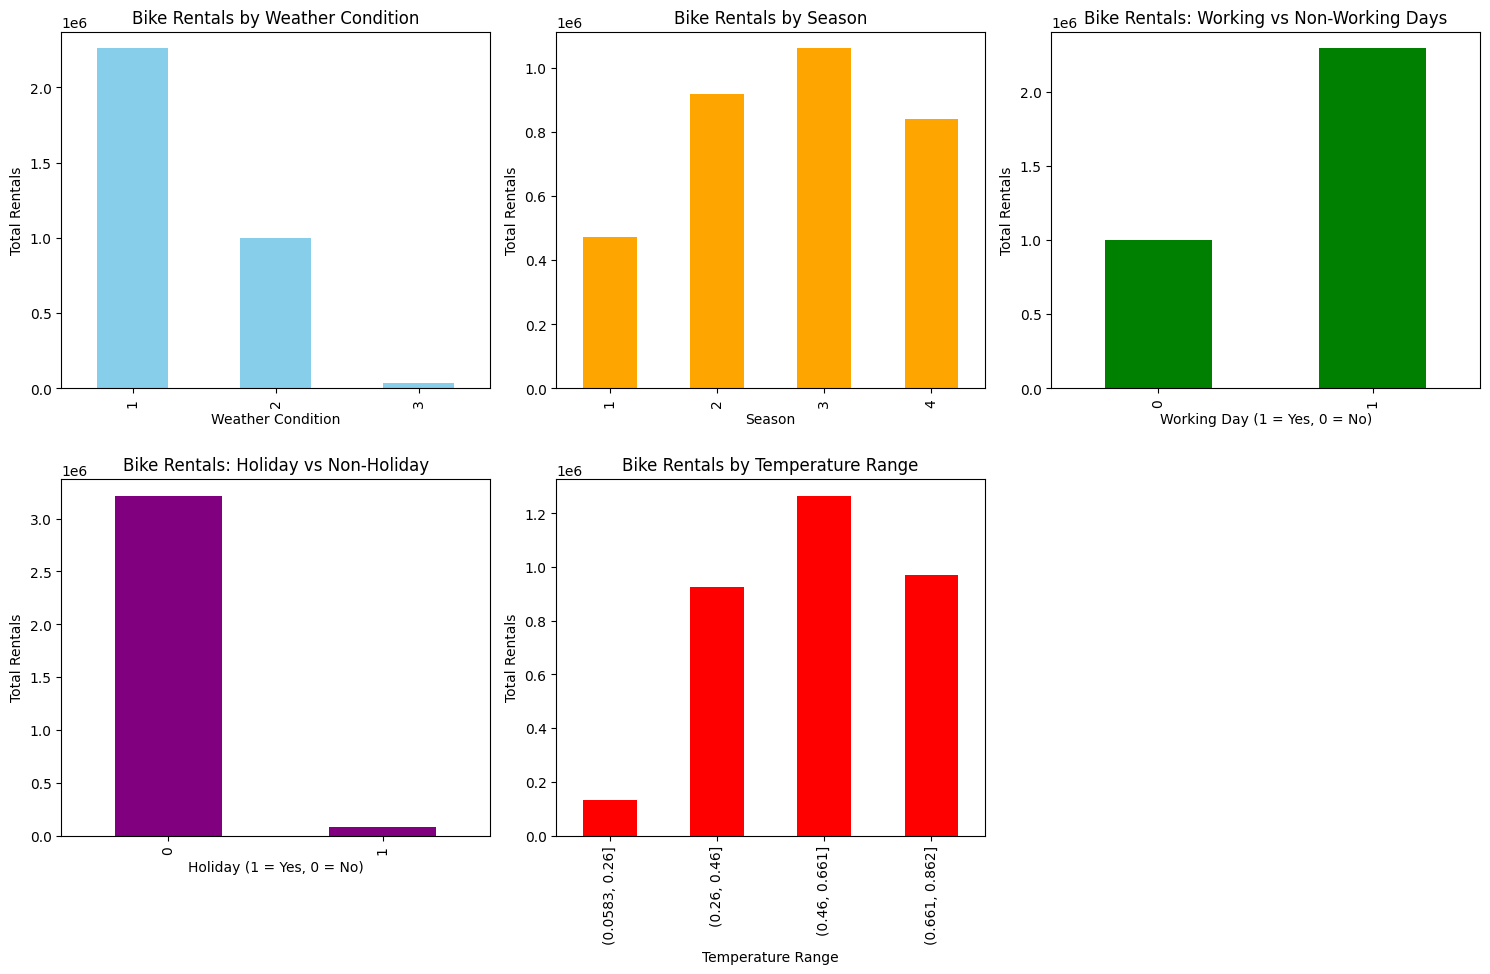

In [ ]:
import warnings
warnings.filterwarnings("ignore")
day_data_path = '/content/day.csv'
day_data = pd.read_csv(day_data_path)
weather_rentals = day_data.groupby('weathersit')['cnt'].sum()
season_rentals = day_data.groupby('season')['cnt'].sum()
workingday_rentals = day_data.groupby('workingday')['cnt'].sum()
holiday_rentals = day_data.groupby('holiday')['cnt'].sum()
temperature_bins = pd.cut(day_data['temp'], bins=4)
temp_rentals = day_data.groupby(temperature_bins)['cnt'].sum()
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
weather_rentals.plot(kind='bar', color='skyblue')
plt.title('Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Rentals')
plt.subplot(2, 3, 2)
season_rentals.plot(kind='bar', color='orange')
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.subplot(2, 3, 3)
workingday_rentals.plot(kind='bar', color='green')
plt.title('Bike Rentals: Working vs Non-Working Days')
plt.xlabel('Working Day (1 = Yes, 0 = No)')
plt.ylabel('Total Rentals')
plt.subplot(2, 3, 4)
holiday_rentals.plot(kind='bar', color='purple')
plt.title('Bike Rentals: Holiday vs Non-Holiday')
plt.xlabel('Holiday (1 = Yes, 0 = No)')
plt.ylabel('Total Rentals')
plt.subplot(2, 3, 5)
temp_rentals.plot(kind='bar', color='red')
plt.title('Bike Rentals by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Total Rentals')
plt.tight_layout()
plt.show()

The most suitable weather condition for bike rentals is: Clear, Few Clouds, Partly Cloudy


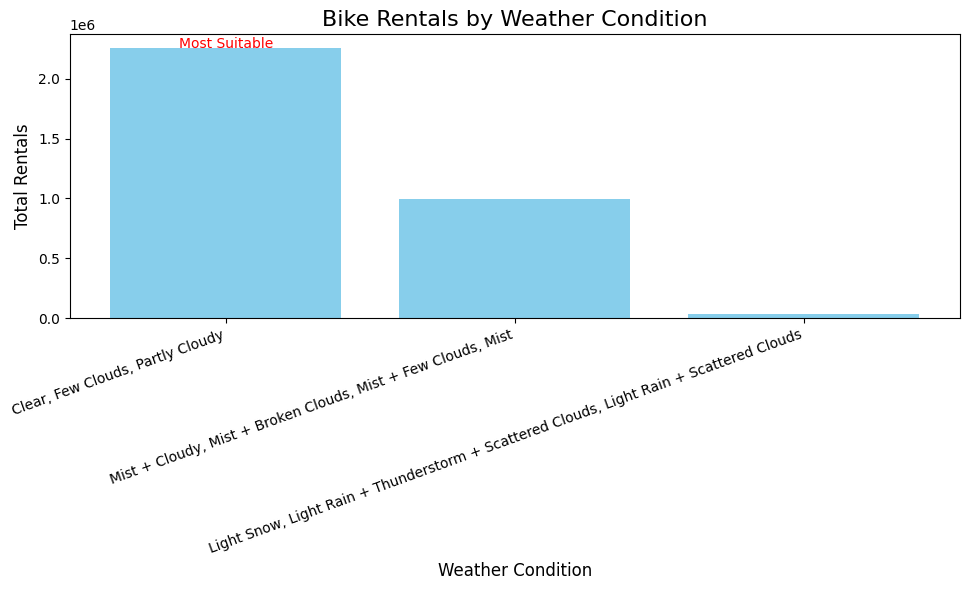

In [ ]:
day_data_path = '/content/day.csv'
day_data = pd.read_csv(day_data_path)
weather_rentals = day_data.groupby('weathersit')['cnt'].sum()
most_suitable_weather = weather_rentals.idxmax()
weather_map = {
    1: "Clear, Few Clouds, Partly Cloudy",
    2: "Mist + Cloudy, Mist + Broken Clouds, Mist + Few Clouds, Mist",
    3: "Light Snow, Light Rain + Thunderstorm + Scattered Clouds, Light Rain + Scattered Clouds",
    4: "Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog"
}
print(f"The most suitable weather condition for bike rentals is: {weather_map[most_suitable_weather]}")
weather_labels = [weather_map[w] for w in weather_rentals.index]
plt.figure(figsize=(10, 6))
plt.bar(weather_labels, weather_rentals, color='skyblue')
plt.title("Bike Rentals by Weather Condition", fontsize=16)
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Total Rentals", fontsize=12)
plt.xticks(rotation=20, ha="right", fontsize=10)
most_suitable_weather = weather_rentals.idxmax()
most_suitable_label = weather_map[most_suitable_weather]
plt.text(weather_labels.index(most_suitable_label), weather_rentals[most_suitable_weather] + 500, "Most Suitable", color='red', ha='center')
plt.tight_layout()
plt.show()

Hourly Utilization of Bike Rentals:
hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64

The hour with the most bike rentals is: 17:00
Number of rentals during this hour: 336860


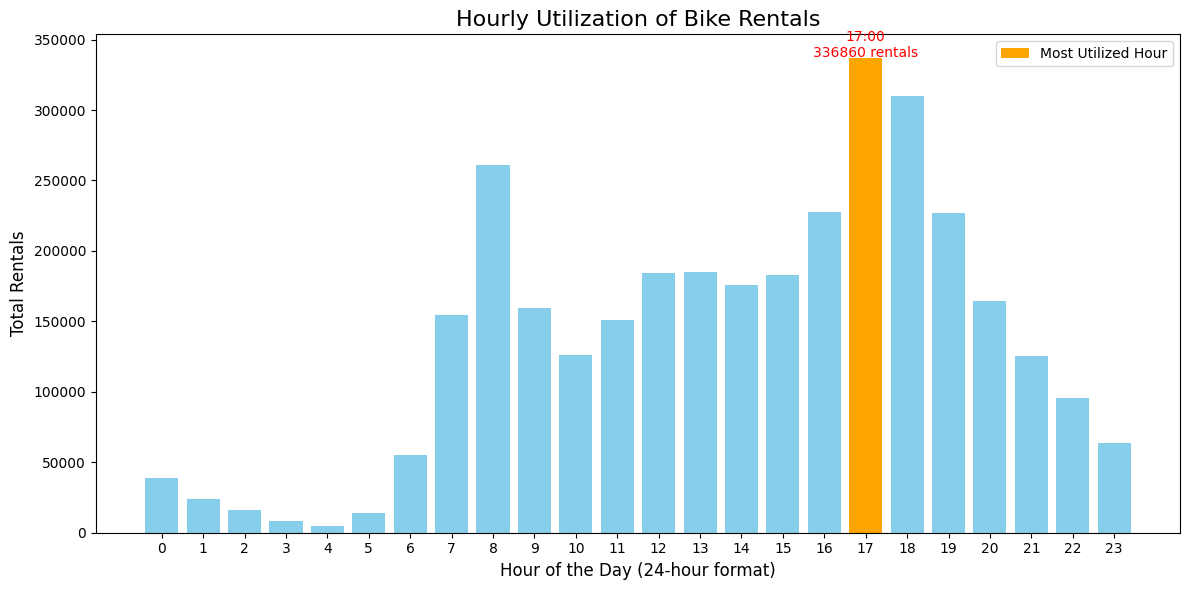

In [ ]:
hour_data_path = '/content/hour.csv'
hour_data = pd.read_csv(hour_data_path)
hourly_rentals = hour_data.groupby('hr')['cnt'].sum()
most_utilized_hour = hourly_rentals.idxmax()
highest_rental_count = hourly_rentals.max()
print("Hourly Utilization of Bike Rentals:")
print(hourly_rentals)
print(f"\nThe hour with the most bike rentals is: {most_utilized_hour}:00")
print(f"Number of rentals during this hour: {highest_rental_count}")
hourly_rentals = hour_data.groupby('hr')['cnt'].sum()
most_utilized_hour = hourly_rentals.idxmax()
highest_rental_count = hourly_rentals.max()
plt.figure(figsize=(12, 6))
plt.bar(hourly_rentals.index, hourly_rentals.values, color='skyblue')
plt.title("Hourly Utilization of Bike Rentals", fontsize=16)
plt.xlabel("Hour of the Day (24-hour format)", fontsize=12)
plt.ylabel("Total Rentals", fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.bar(most_utilized_hour, highest_rental_count, color='orange', label='Most Utilized Hour')
plt.legend()
plt.text(most_utilized_hour, highest_rental_count + 500,
         f"{most_utilized_hour}:00\n{highest_rental_count} rentals",
         color='red', ha='center', fontsize=10)
plt.tight_layout()
plt.show()